# Classification Metrics

## Biz Case Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/01_MWF_Intro_to_ML/11_Classification_Metrics_2/spam_ham_dataset.csv
100%|██████████████████████████████████████| 5.50M/5.50M [00:00<00:00, 11.5MB/s]


In [3]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/01_MWF_Intro_to_ML/11_Classification_Metrics_2/Spam_finalData.csv
100%|██████████████████████████████████████| 1.64M/1.64M [00:00<00:00, 15.8MB/s]


In [5]:
dt = pd.read_csv('Spam_finalData.csv')

In [6]:
dt.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

In [8]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [9]:
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.9311678267594741


## Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[862,  69],
       [ 20, 342]])

In [11]:
from matplotlib import pyplot as plt

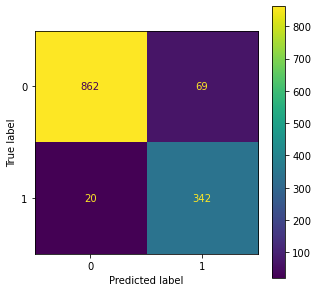

In [12]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [13]:
# accuracy 
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.9311678267594741

## Precision

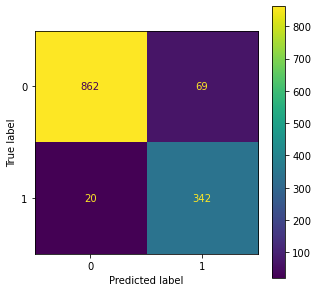

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)


In [15]:
def precision_calc(conf):
    tp = conf[1,1]
    fp = conf[0,1]

    return tp/(tp+fp)

In [16]:
precision_calc(conf_matrix)

0.8321167883211679

In [17]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8321167883211679

## Recall

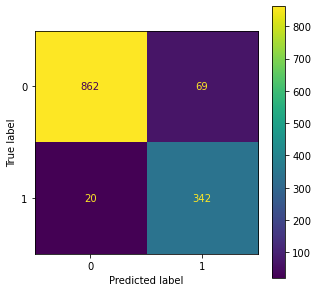

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [19]:
def recall_calc(conf):
    tp = conf[1,1]
    fn = conf[1,0]

    return tp/(tp+fn)

In [20]:
recall_calc(conf_matrix)

0.9447513812154696

In [21]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9447513812154696

## F1-Score

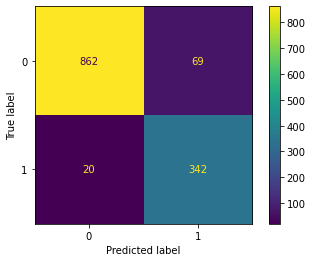

In [22]:
ConfusionMatrixDisplay(conf_matrix).plot()


In [23]:
pre = precision_calc(conf_matrix)
re = precision_calc(conf_matrix)

f1 = 2* (pre*re)/(pre+re+1e-6)

print(f'f1Score:{f1}')

f1Score:0.8321162883214683


In [24]:
from sklearn.metrics import f1_score

In [25]:
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.8848641655886158


## AU-ROC curve Code

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score


In [27]:
probability = model.predict_proba(X_test)

In [28]:
probability

array([[0.19766524, 0.80233476],
       [0.43823766, 0.56176234],
       [0.28611395, 0.71388605],
       ...,
       [0.99178704, 0.00821296],
       [0.98299484, 0.01700516],
       [0.2860388 , 0.7139612 ]])

In [29]:
probabilites = probability[:,1]

In [30]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

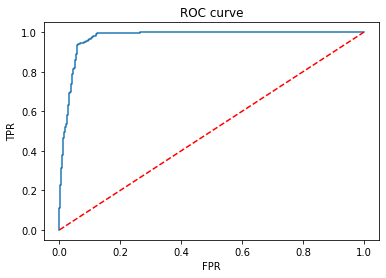

In [31]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [32]:
# AUC
roc_auc_score(y_test,probabilites)

0.9734735417865896

## **Precision Recall Curve Code**

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [34]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

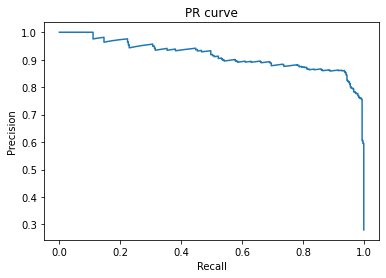

In [35]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [36]:
auc(recall, precision)

0.9150774200630456

# Class Imbalance

## Dataset Intro + Training

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/01_MWF_Intro_to_ML/11_Classification_Metrics_2/Spam_finalData.csv
100%|██████████████████████████████████████| 1.64M/1.64M [00:00<00:00, 10.6MB/s]


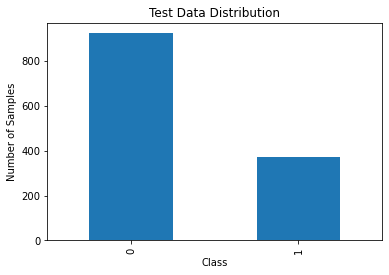

Training Data:(3878, 15),(3878,), Testing Data: (1293, 15),(1293,)


LogisticRegression()

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

dt = pd.read_csv('Spam_finalData.csv')




X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()


print(f'Training Data:{X_train.shape},{y_train.shape}, Testing Data: {X_test.shape},{y_test.shape}')





model = LogisticRegression()
model.fit(X_train,y_train)


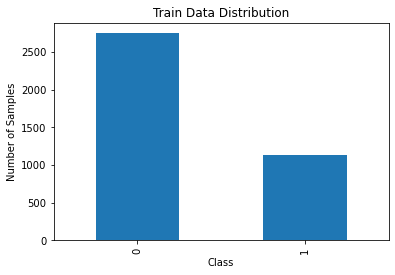

In [38]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

## **Class weight Code**

In [39]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

    model.fit(X_train, y_train)

    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)

    train_score = f1_score(y_train, train_y_pred)
    test_score = f1_score(y_test, test_y_pred)

    return train_score,test_score


In [40]:
# minority class needs more re-weighting


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight={0:1,1:2.37})

f1_train,f1_test = training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Training F1 score:0.8463571158927896, Testing F1 score:0.8433179723502305


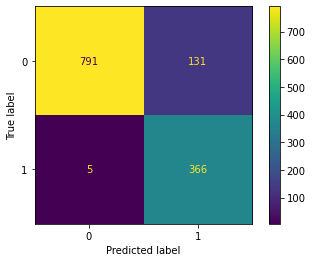

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

## **Oversampling**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling on the training data
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()

f1_train,f1_test = training(model,X_train_oversampled, y_train_oversampled,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
0    2750
1    1128
Name: label_num, dtype: int64
After Oversampling
0    2750
1    2750
Name: label_num, dtype: int64
Training F1 score:0.9290563475899525, Testing F1 score:0.8413793103448275
